# Analysis of PREP Services Data by Subcounty, October-December 2024 and Merging with Subcounty Geographic Data

In [87]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [88]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Merging together two datasets on PREP services (one only for new PREP users and one for returning PREP users, for the same period)

In [89]:
prep_new = pd.read_csv('PREP Services.xlsx - PREP_NEW.csv')

In [90]:
pd.set_option('display.max_columns', None)

In [91]:
prep_new.head()

,KP Tracker ID,Region,Tracker District,KP Tracker Subcounty,KP Tracker Service outlet,KP Tracker Mechanism name,DATIM,DHIS2 ID,DHIS2 District,DHIS2 Subcounty,DHIS2 HF Name,COP Mechanism name (DAPTS List),COP Mechanism ID,Agency,Period,Comment,IP Response to column P,PREP _NEW Overall Total,PREP_NEW Total Female,PREP_NEW Total Male,"(15 - 19) Years, Female","(15 - 19) Years, Male","20-24 Years, Female","20-24 Years, Male","Female, 25 - 29 years","Male, 25 - 29 years","Female, 30-34 years","Male, 30-34 years","Female, 35-39 years","Male, 35-39 years","Female, 40 - 44 years","Male, 40 - 44 years","Female, 45 - 49 years","Male, 45 - 49 years","50+ Years, Female","50+ Years, Male",Total KP received PReP_NEW,"MSM, Male",Transgender,Sex Workers,PWID,People in prisons and other enclosed settings (Incarcerated Population),Pregnant,Breast feeding,Health Facility,Community,Oral,Injectable,Other including Ring,Ring,Event driven prep,Adolescents and young women (10-24) years,Clients of sex workers,"Displaced persons (e.g., refugees)",Fishing communities,"Military and other uniformed services (including police, border guards, and security workers),Female","Mobile Populations (e.g., migrant workers, truck drivers)",Non-injecting drug users,Discordant Couples,Others
0,Teso,Amuria District,Amuria Town Council,oRHreBW5Tyr,Amuria Hospital,CoP23 - AIC_Soroti Region,CaGjhbitWT4,oRHreBW5Tyr,Amuria District,Amuria Town Council,Amuria Hospital,AIC_Soroti Region,87041.0,CDC,Oct-Dec 2024,NaN,NaN,4,1,3,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,4,0,0,0,0,0,0,0,0,0,0,0,1,3
1,Teso,Serere District,Bugondo Subcounty,qzSy84YdUkX,Apapai HC IV,CoP23 - AIC_Soroti Region,U7nanCZTlvQ,qzSy84YdUkX,Serere District,Bugondo Subcounty,Apapai HC IV,AIC_Soroti Region,87041.0,CDC,Oct-Dec 2024,NaN,NaN,15,15,0,2,0,7,0,0,0,3,0,1,0,2,0,0,0,0,0,15,0,0,15,0,0,0,0,0,15,15,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Teso,Bukedea District,Bukedea Town Council,tpIyT18ybqD,Bukedea HC IV,CoP23 - AIC_Soroti Region,ZhlrG04KfIT,tpIyT18ybqD,Bukedea District,Bukedea Town Council,Bukedea HC IV,AIC_Soroti Region,87041.0,CDC,Oct-Dec 2024,NaN,NaN,83,81,2,15,0,31,1,22,0,8,1,4,0,0,0,0,0,1,0,71,0,0,71,0,0,0,0,0,83,82,0,0,0,0,9,2,0,0,0,0,0,0,0
3,Teso,Soroti City,Eastern Division (Soroti MC),YS1I62rL00h,Eastern Division HC III,CoP23 - AIC_Soroti Region,YRU5qIg7Pzz,YS1I62rL00h,Soroti City,Soroti East Division,Eastern Division HC III,AIC_Soroti Region,87041.0,CDC,Oct-Dec 2024,NaN,NaN,83,44,39,4,2,14,5,13,10,5,11,8,11,0,0,0,0,0,0,45,0,0,45,0,0,0,0,0,83,83,0,0,0,0,0,9,0,0,0,0,0,0,0
4,Teso,Katakwi District,Katakwi Town Council,l5XOgabZp4j,Katakwi Hospital,CoP23 - AIC_Soroti Region,AvyiIZtBN09,l5XOgabZp4j,Katakwi District,Katakwi Town Council,Katakwi Hospital,AIC_Soroti Region,87041.0,CDC,Oct-Dec 2024,NaN,NaN,10,8,2,0,0,0,0,1,1,3,1,1,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,10,0,10,0,0,0,0,0,0,0,0,0,0,0,10,0


In [92]:
prep_new.columns = prep_new.columns.str.strip()

selected_columns_v2 = [
    'Region',
    'DHIS2 District',
    'DHIS2 Subcounty',
    'DHIS2 HF Name',
    'Agency',
    'MSM, Male',
    'Transgender',
    'Sex Workers',
    'PWID',
    'People in prisons and other enclosed settings (Incarcerated Population)',
    'Pregnant',
    'Breast feeding',
    'Health Facility',
    'Community',
    'Adolescents and young women (10-24) years',
    'Clients of sex workers',
    'Displaced persons (e.g., refugees)',
    'Fishing communities',
    'Military and other uniformed services (including police, border guards, and security workers),Female',
    'Mobile Populations (e.g., migrant workers, truck drivers)',
    'Non-injecting drug users',
    'Discordant Couples'
]

prep_new_filter = prep_new[selected_columns_v2]

In [93]:
prep_new_filter

,Region,DHIS2 District,DHIS2 Subcounty,DHIS2 HF Name,Agency,"MSM, Male",Transgender,Sex Workers,PWID,People in prisons and other enclosed settings (Incarcerated Population),Pregnant,Breast feeding,Health Facility,Community,Adolescents and young women (10-24) years,Clients of sex workers,"Displaced persons (e.g., refugees)",Fishing communities,"Military and other uniformed services (including police, border guards, and security workers),Female","Mobile Populations (e.g., migrant workers, truck drivers)",Non-injecting drug users,Discordant Couples
0,Amuria District,Amuria District,Amuria Town Council,Amuria Hospital,CDC,0,0,0,0,0,0,0,1,3,0,0,0,0,0,0,0,1
1,Serere District,Serere District,Bugondo Subcounty,Apapai HC IV,CDC,0,0,15,0,0,0,0,0,15,0,0,0,0,0,0,0,0
2,Bukedea District,Bukedea District,Bukedea Town Council,Bukedea HC IV,CDC,0,0,71,0,0,0,0,0,83,9,2,0,0,0,0,0,0
3,Soroti City,Soroti City,Soroti East Division,Eastern Division HC III,CDC,0,0,45,0,0,0,0,0,83,0,9,0,0,0,0,0,0
4,Katakwi District,Katakwi District,Katakwi Town Council,Katakwi Hospital,CDC,0,0,0,0,0,0,0,10,0,0,0,0,0,0,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627,Kampala District,Kampala District,Nakawa Division,Kiswa HC III,CDC,132,99,189,1,0,10,10,65,478,21,8,0,3,10,6,0,4
628,Kampala District,Kampala District,Lubaga Division,Kitebi Health Centre HC III,CDC,0,0,465,0,0,0,0,223,426,3,100,0,0,0,0,0,12
629,Kampala District,Kampala District,Kawempe Division,Komamboga HC III,CDC,143,20,373,4,0,0,0,38,669,37,91,0,0,2,12,0,15
630,Kampala District,Kampala District,Mulago National Referral Hospital,Mulago NRH - MARPI STI Project Clinic,CDC,803,37,819,67,0,0,0,16,1757,6,8,0,0,0,2,25,0


In [94]:
prep_old = pd.read_csv('PREP Services.xlsx - PREP_CT.csv')

In [95]:
prep_old.head()

,Statistical Region,KP Tracker ID,KP Tracker District,KP Tracker Subcounty,KP Tracker Service outlet,KP Tracker Mechanism name,KP Tracker US Agency,DATIM ID,DHIS2 ID,DHIS2 District,DHIS2 Subcounty,DHIS2 HF Name,COP Mechanism name,IM ID,Agency,Period,Comment,IP Comment for action to be taken,PREP _CT Overall Total,PrEP_CT Total Female,PrEP_CT Total Male,"(15 - 19) Years, Female","(15 - 19) Years, Male","20-24 Years, Female","20-24 Years, Male","Female, 25 - 29 years","Male, 25 - 29 years","Female, 30-34 years","Male, 30-34 years","Female, 35-39 years","Male, 35-39 years","Female, 40 - 44 years","Male, 40 - 44 years","Female, 45 - 49 years","Male, 45 - 49 years","50+ Years, Female","50+ Years, Male",Total,Positive Total,Negative Total,Other,"(15 - 19) Years, Female.1","(15 - 19) Years, Male.1","20-24 Years, Female.1","20-24 Years, Male.1","Female, 25 - 29 years.1","Male, 25 - 29 years.1","Female, 30-34 years.1","Male, 30-34 years.1","Female, 35-39 years.1","Male, 35-39 years.1","Female, 40 - 44 years.1","Male, 40 - 44 years.1","Female, 45 - 49 years.1","Male, 45 - 49 years.1","50+ Years, Female.1","50+ Years, Male.1","(15 - 19) Years, Female.2","(15 - 19) Years, Male.2","20-24 Years, Female.2","20-24 Years, Male.2","Female, 25 - 29 years.2","Male, 25 - 29 years.2","Female, 30-34 years.2","Male, 30-34 years.2","Female, 35-39 years.2","Male, 35-39 years.2","Female, 40 - 44 years.2","Male, 40 - 44 years.2","Female, 45 - 49 years.2","Male, 45 - 49 years.2","50+ Years, Female.2","50+ Years, Male.2","(15 - 19) Years, Female.3","(15 - 19) Years, Male.3","20-24 Years, Female.3","20-24 Years, Male.3","Female, 25 - 29 years.3","Male, 25 - 29 years.3","Female, 30-34 years.3","Male, 30-34 years.3","Female, 35-39 years.3","Male, 35-39 years.3","Female, 40 - 44 years.3","Male, 40 - 44 years.3","Female, 45 - 49 years.3","Male, 45 - 49 years.3","50+ Years, Female.3","50+ Years, Male.3",Total KP received PrEP_CT,"MSM, Male",Sub-total Transgender,"Sex Workers, Female",PWID,People in prisons and other enclosed settings (Incarcerated Population),Pregnant,Breast feeding,Health Facility,Community,Oral,Injectable,Other including Ring,Ring,EDV PREP,Adolescents and young women (10-24) years,Clients of sex workers,"Displaced persons (e.g., refugees)",Fishing communities,"Military and other uniformed services (including police, border guards, and security workers),Female","Mobile Populations (e.g., migrant workers, truck drivers)",Truck drivers,Non-injecting drug users,Discordant Couples,Other.1
0,North Central,a01gDo4KauR,Luwero District,Bombo Town Council,St. Luke Namaliga HC III,WALTER REED_MUWRP,NaN,iOoM7kbje9s,a01gDo4KauR,Luwero District,Bombo Town Council,St. Luke Namaliga HC IV,WALTER REED_MUWRP,160699.0,DOD,Oct-Dec 2024,NaN,NaN,5,3,2,NaN,NaN,2.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,6,0,6,0,0,0,0,3,1,0,0,0,0,1,0,0,0
1,Tooro,a0Tgsf83fGB,Bunyangabu District,Kiyombya Subcounty,Kiyombya HC III,Baylor Fort Portal_Mubende Region,NaN,G7n2M7Hqw4S,a0Tgsf83fGB,Bunyangabu District,Kiyombya Subcounty,Kiyombya HC III,Baylor_Fort Portal_Mubende Region,87039.0,CDC,Oct-Dec 2024,NaN,NaN,147,105,42,1.0,1.0,17.0,7.0,24.0,5.0,27.0,6.0,15.0,11.0,10.0,9.0,3.0,1.0,8.0,2.0,147,0,0,147,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,17,7,24,5,27,6,15,11,10,9,3,1,8,2,83,0,0,83,0,0,0,0,0,148,147,0,0,0,0,0,21,0,0,1,19,0,0,17,0
2,West Nile,a1DNpYv02JK,Pakwach District,Pakwach Town Council,Pakwach Mission HC III,UEC,NaN,Fxfs6HysZOX,a1DNpYv02JK,Pakwach District,Pakwach Town Council,Pakwach Mission HC III,UEC,81974.0,CDC,Oct-Dec 2024,NaN,NaN,3,2,1,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,3,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,2,1,3,0,0,0,0,0,0,0,1,0,0,0,0,2,0
3,Tooro,a1H4RSyoXOj,Kyegegwa District,Hapuuyo Town Council,Hapuuyo 

In [96]:
prep_old.columns = prep_old.columns.str.strip()

selected_columns = [
    'Statistical Region',
    'DHIS2 District',
    'DHIS2 Subcounty',
    'DHIS2 HF Name',
    'Agency',
    'MSM, Male',
    'Sub-total Transgender',
    'Sex Workers, Female',
    'PWID',
    'People in prisons and other enclosed settings (Incarcerated Population)',
    'Pregnant',
    'Breast feeding',
    'Health Facility',
    'Community',
    'Adolescents and young women (10-24) years',
    'Clients of sex workers',
    'Displaced persons (e.g., refugees)',
    'Fishing communities',
    'Military and other uniformed services (including police, border guards, and security workers),Female',
    'Mobile Populations (e.g., migrant workers, truck drivers)',
    'Truck drivers',
    'Non-injecting drug users',
    'Discordant Couples'
]

prep_old_filter = prep_old[selected_columns]

In [97]:
prep_old_filter

,Statistical Region,DHIS2 District,DHIS2 Subcounty,DHIS2 HF Name,Agency,"MSM, Male",Sub-total Transgender,"Sex Workers, Female",PWID,People in prisons and other enclosed settings (Incarcerated Population),Pregnant,Breast feeding,Health Facility,Community,Adolescents and young women (10-24) years,Clients of sex workers,"Displaced persons (e.g., refugees)",Fishing communities,"Military and other uniformed services (including police, border guards, and security workers),Female","Mobile Populations (e.g., migrant workers, truck drivers)",Truck drivers,Non-injecting drug users,Discordant Couples
0,North Central,Luwero District,Bombo Town Council,St. Luke Namaliga HC IV,DOD,0,0,1,0,0,0,0,6,0,3,1,0,0,0,0,1,0,0
1,Tooro,Bunyangabu District,Kiyombya Subcounty,Kiyombya HC III,CDC,0,0,83,0,0,0,0,0,148,0,21,0,0,1,19,0,0,17
2,West Nile,Pakwach District,Pakwach Town Council,Pakwach Mission HC III,CDC,0,0,0,0,0,0,0,2,1,0,0,0,1,0,0,0,0,2
3,Tooro,Kyegegwa District,Hapuuyo Town Council,Hapuuyo HC III,CDC,0,0,50,0,0,0,0,0,57,2,2,0,0,0,0,0,0,2
4,Tooro,Kamwenge District,Bwizi Subcounty,Bwizi HC III,NaN,0,0,2,0,0,0,0,0,7,0,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650,North Central,Nakaseke District,Semuto Town Council,Semuto HC IV,CDC,0,0,144,0,0,0,0,95,65,0,12,0,0,0,0,1,0,3
651,Busoga,Namayingo District,Mutumba Town Council,Mutumba Health Centre III,USAID,0,0,13,0,0,0,0,0,35,0,0,0,13,0,0,0,0,5
652,Tooro,Kasese District,Kyarumba Town Council,Kyarumba HC III,NaN,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0
653,Bunyoro,Kakumiro District,Nkooko Town Council,Nkooko HC III,CDC,0,0,88,0,0,0,0,17,97,4,22,0,0,0,0,0,0,0


In [98]:
prep_old_filter = prep_old_filter.rename(columns={
    'Statistical Region': 'Region',
    'Sub-total Transgender': 'Transgender',
    'Sex Workers, Female': 'Sex Workers',
    'Clients of sex workers': 'Clients of sex workers',  # unchanged
    'Displaced persons (e.g., refugees)': 'Displaced persons (e.g., refugees)',  # unchanged
    'Fishing communities': 'Fishing communities',  # unchanged
    'Military and other uniformed services (including police, border guards, and security workers),Female': 'Military and other uniformed services (including police, border guards, and security workers),Female',  # unchanged
})


In [99]:
prep_old_filter

,Region,DHIS2 District,DHIS2 Subcounty,DHIS2 HF Name,Agency,"MSM, Male",Transgender,Sex Workers,PWID,People in prisons and other enclosed settings (Incarcerated Population),Pregnant,Breast feeding,Health Facility,Community,Adolescents and young women (10-24) years,Clients of sex workers,"Displaced persons (e.g., refugees)",Fishing communities,"Military and other uniformed services (including police, border guards, and security workers),Female","Mobile Populations (e.g., migrant workers, truck drivers)",Truck drivers,Non-injecting drug users,Discordant Couples
0,North Central,Luwero District,Bombo Town Council,St. Luke Namaliga HC IV,DOD,0,0,1,0,0,0,0,6,0,3,1,0,0,0,0,1,0,0
1,Tooro,Bunyangabu District,Kiyombya Subcounty,Kiyombya HC III,CDC,0,0,83,0,0,0,0,0,148,0,21,0,0,1,19,0,0,17
2,West Nile,Pakwach District,Pakwach Town Council,Pakwach Mission HC III,CDC,0,0,0,0,0,0,0,2,1,0,0,0,1,0,0,0,0,2
3,Tooro,Kyegegwa District,Hapuuyo Town Council,Hapuuyo HC III,CDC,0,0,50,0,0,0,0,0,57,2,2,0,0,0,0,0,0,2
4,Tooro,Kamwenge District,Bwizi Subcounty,Bwizi HC III,NaN,0,0,2,0,0,0,0,0,7,0,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650,North Central,Nakaseke District,Semuto Town Council,Semuto HC IV,CDC,0,0,144,0,0,0,0,95,65,0,12,0,0,0,0,1,0,3
651,Busoga,Namayingo District,Mutumba Town Council,Mutumba Health Centre III,USAID,0,0,13,0,0,0,0,0,35,0,0,0,13,0,0,0,0,5
652,Tooro,Kasese District,Kyarumba Town Council,Kyarumba HC III,NaN,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0
653,Bunyoro,Kakumiro District,Nkooko Town Council,Nkooko HC III,CDC,0,0,88,0,0,0,0,17,97,4,22,0,0,0,0,0,0,0


In [100]:
# List the columns of the DataFrame
prep_old_filter.columns.tolist()


['Region',
 'DHIS2 District',
 'DHIS2 Subcounty',
 'DHIS2 HF Name',
 'Agency',
 'MSM, Male',
 'Transgender',
 'Sex Workers',
 'PWID',
 'People in prisons and other enclosed settings (Incarcerated Population)',
 'Pregnant',
 'Breast feeding',
 'Health Facility',
 'Community',
 'Adolescents and young women (10-24) years',
 'Clients of sex workers',
 'Displaced persons (e.g., refugees)',
 'Fishing communities',
 'Military and other uniformed services (including police, border guards, and security workers),Female',
 'Mobile Populations (e.g., migrant workers, truck drivers)',
 'Truck drivers',
 'Non-injecting drug users',
 'Discordant Couples']

In [101]:
prep_old_filter['Mobile Populations (e.g., migrant workers, truck drivers)'] = prep_old_filter['Mobile Populations (e.g., migrant workers, truck drivers)'] + prep_old_filter['Truck drivers']

In [102]:
prep_old_filter = prep_old_filter.drop(columns='Truck drivers')

In [111]:
prep_old_filter = prep_old_filter.drop(columns='Region')

In [112]:
prep_new_filter = prep_new_filter.drop(columns='Region')

In [106]:
prep_new_filter

,Region,DHIS2 District,DHIS2 Subcounty,DHIS2 HF Name,Agency,"MSM, Male",Transgender,Sex Workers,PWID,People in prisons and other enclosed settings (Incarcerated Population),Pregnant,Breast feeding,Health Facility,Community,Adolescents and young women (10-24) years,Clients of sex workers,"Displaced persons (e.g., refugees)",Fishing communities,"Military and other uniformed services (including police, border guards, and security workers),Female","Mobile Populations (e.g., migrant workers, truck drivers)",Non-injecting drug users,Discordant Couples
0,Amuria District,Amuria District,Amuria Town Council,Amuria Hospital,CDC,0,0,0,0,0,0,0,1,3,0,0,0,0,0,0,0,1
1,Serere District,Serere District,Bugondo Subcounty,Apapai HC IV,CDC,0,0,15,0,0,0,0,0,15,0,0,0,0,0,0,0,0
2,Bukedea District,Bukedea District,Bukedea Town Council,Bukedea HC IV,CDC,0,0,71,0,0,0,0,0,83,9,2,0,0,0,0,0,0
3,Soroti City,Soroti City,Soroti East Division,Eastern Division HC III,CDC,0,0,45,0,0,0,0,0,83,0,9,0,0,0,0,0,0
4,Katakwi District,Katakwi District,Katakwi Town Council,Katakwi Hospital,CDC,0,0,0,0,0,0,0,10,0,0,0,0,0,0,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627,Kampala District,Kampala District,Nakawa Division,Kiswa HC III,CDC,132,99,189,1,0,10,10,65,478,21,8,0,3,10,6,0,4
628,Kampala District,Kampala District,Lubaga Division,Kitebi Health Centre HC III,CDC,0,0,465,0,0,0,0,223,426,3,100,0,0,0,0,0,12
629,Kampala District,Kampala District,Kawempe Division,Komamboga HC III,CDC,143,20,373,4,0,0,0,38,669,37,91,0,0,2,12,0,15
630,Kampala District,Kampala District,Mulago National Referral Hospital,Mulago NRH - MARPI STI Project Clinic,CDC,803,37,819,67,0,0,0,16,1757,6,8,0,0,0,2,25,0


In [114]:
# Check the columns in the merged DataFrame
print(merged_df.columns)


Index(['DHIS2 District', 'DHIS2 Subcounty', 'DHIS2 HF Name', 'Agency',
       'MSM, Male_x', 'Transgender_x', 'Sex Workers_x', 'PWID_x',
       'People in prisons and other enclosed settings (Incarcerated Population)_x',
       'Pregnant_x', 'Breast feeding_x', 'Health Facility_x', 'Community_x',
       'Adolescents and young women (10-24) years_x',
       'Clients of sex workers_x', 'Displaced persons (e.g., refugees)_x',
       'Fishing communities_x',
       'Military and other uniformed services (including police, border guards, and security workers),Female_x',
       'Mobile Populations (e.g., migrant workers, truck drivers)_x',
       'Non-injecting drug users_x', 'Discordant Couples_x', 'MSM, Male_y',
       'Transgender_y', 'Sex Workers_y', 'PWID_y',
       'People in prisons and other enclosed settings (Incarcerated Population)_y',
       'Pregnant_y', 'Breast feeding_y', 'Health Facility_y', 'Community_y',
       'Adolescents and young women (10-24) years_y',
       'Clients 

In [115]:
# List of numerical columns (columns with '_x' and '_y' suffixes)
numerical_cols_x = [col for col in merged_df.columns if col.endswith('_x')]
numerical_cols_y = [col for col in merged_df.columns if col.endswith('_y')]

# Fill NaN values in these columns with 0 (to avoid NaN during summing)
merged_df[numerical_cols_x + numerical_cols_y] = merged_df[numerical_cols_x + numerical_cols_y].fillna(0)

# Sum the numerical columns across both DataFrames
for col_x, col_y in zip(numerical_cols_x, numerical_cols_y):
    # Remove the '_x' and '_y' suffixes to create a base name for the column
    base_col = col_x[:-2]
    
    # Sum the '_x' and '_y' columns and store the result in the base column
    merged_df[base_col] = merged_df[col_x] + merged_df[col_y]

# Drop the original '_x' and '_y' columns after summing
merged_df = merged_df.drop(columns=numerical_cols_x + numerical_cols_y)

# Check the result
print(merged_df.head())


      DHIS2 District        DHIS2 Subcounty  \
0  Adjumani District  Adjumani Town Council   
1  Adjumani District  Adjumani Town Council   
2     Agago District   Adilang Town Council   
3     Agago District   Kalongo Town Council   
4     Agago District   Patongo Town Council   

                         DHIS2 HF Name Agency  MSM, Male  Transgender  \
0                    Adjumani Hospital    CDC        0.0          0.0   
1              Adjumani Mission HC III    CDC        0.0          0.0   
2                       Adilang HC III  USAID        0.0          0.0   
3  Kalongo Ambrosoli Memorial Hospital  USAID        0.0          0.0   
4                        Patongo HC IV  USAID        0.0          0.0   

   Sex Workers  PWID  \
0        533.0   0.0   
1         11.0   0.0   
2        220.0   0.0   
3          2.0   0.0   
4        191.0   1.0   

   People in prisons and other enclosed settings (Incarcerated Population)  \
0                                                0.0   

In [117]:
prep = merged_df

In [118]:
prep

,DHIS2 District,DHIS2 Subcounty,DHIS2 HF Name,Agency,"MSM, Male",Transgender,Sex Workers,PWID,People in prisons and other enclosed settings (Incarcerated Population),Pregnant,Breast feeding,Health Facility,Community,Adolescents and young women (10-24) years,Clients of sex workers,"Displaced persons (e.g., refugees)",Fishing communities,"Military and other uniformed services (including police, border guards, and security workers),Female","Mobile Populations (e.g., migrant workers, truck drivers)",Non-injecting drug users,Discordant Couples
0,Adjumani District,Adjumani Town Council,Adjumani Hospital,CDC,0.0,0.0,533.0,0.0,0.0,0.0,0.0,6.0,1069.0,3.0,15.0,12.0,141.0,19.0,226.0,1.0,22.0
1,Adjumani District,Adjumani Town Council,Adjumani Mission HC III,CDC,0.0,0.0,11.0,0.0,0.0,0.0,0.0,1.0,18.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0
2,Agago District,Adilang Town Council,Adilang HC III,USAID,0.0,0.0,220.0,0.0,0.0,3.0,6.0,48.0,459.0,139.0,2.0,0.0,0.0,0.0,12.0,0.0,17.0
3,Agago District,Kalongo Town Council,Kalongo Ambrosoli Memorial Hospital,USAID,0.0,0.0,2.0,0.0,0.0,0.0,0.0,20.0,7.0,2.0,0.0,0.0,0.0,0.0,18.0,0.0,5.0
4,Agago District,Patongo Town Council,Patongo HC IV,USAID,0.0,0.0,191.0,1.0,0.0,1.0,5.0,54.0,336.0,14.0,124.0,0.0,0.0,2.0,14.0,1.0,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672,Wakiso District,Wakiso Town Council,Wakiso HC IV,CDC,156.0,22.0,709.0,0.0,0.0,2.0,2.0,144.0,1313.0,26.0,429.0,0.0,0.0,0.0,1.0,0.0,10.0
673,Yumbe District,Lodonga Town Council,Lodonga HC IV,CDC,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,3.0
674,Yumbe District,Yumbe Town Council,Yumbe HC IV,CDC,1.0,0.0,598.0,1.0,0.0,9.0,11.0,31.0,940.0,8.0,104.0,17.0,4.0,49.0,46.0,43.0,23.0
675,Zombo District,Nyapea Subcounty,Nyapea Hospital,CDC,0.0,0.0,12.0,0.0,0.0,0.0,0.0,6.0,54.0,0.0,10.0,1.0,0.0,0.0,10.0,6.0,6.0


In [83]:
prep['DHIS2 HF Name'].value_counts()

DHIS2 HF Name
Adjumani Hospital                     1
Kyatiri HC III                        1
Ssunga HC III                         1
Kyanamukaaka HC IV                    1
Bwijanga HC IV                        1
                                     ..
Kiruddu National Referral Hospital    1
Kisugu HC III                         1
St. Francis Nsambya Hospital          1
Wentz Medical Centre HC III           1
Paidha HC III                         1
Name: count, Length: 624, dtype: int64

## Creating variables for each funding agency

In [120]:
prep['usaid'] = (prep['Agency'] == 'USAID').astype(int)

In [121]:
prep['cdc'] = (prep['Agency'] == 'CDC').astype(int)

In [122]:
prep['dod'] = (prep['Agency'] == 'DOD').astype(int)

In [123]:
prep.head()

,DHIS2 District,DHIS2 Subcounty,DHIS2 HF Name,Agency,"MSM, Male",Transgender,Sex Workers,PWID,People in prisons and other enclosed settings (Incarcerated Population),Pregnant,Breast feeding,Health Facility,Community,Adolescents and young women (10-24) years,Clients of sex workers,"Displaced persons (e.g., refugees)",Fishing communities,"Military and other uniformed services (including police, border guards, and security workers),Female","Mobile Populations (e.g., migrant workers, truck drivers)",Non-injecting drug users,Discordant Couples,usaid,cdc,dod
0,Adjumani District,Adjumani Town Council,Adjumani Hospital,CDC,0.0,0.0,533.0,0.0,0.0,0.0,0.0,6.0,1069.0,3.0,15.0,12.0,141.0,19.0,226.0,1.0,22.0,0,1,0
1,Adjumani District,Adjumani Town Council,Adjumani Mission HC III,CDC,0.0,0.0,11.0,0.0,0.0,0.0,0.0,1.0,18.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0,1,0
2,Agago District,Adilang Town Council,Adilang HC III,USAID,0.0,0.0,220.0,0.0,0.0,3.0,6.0,48.0,459.0,139.0,2.0,0.0,0.0,0.0,12.0,0.0,17.0,1,0,0
3,Agago District,Kalongo Town Council,Kalongo Ambrosoli Memorial Hospital,USAID,0.0,0.0,2.0,0.0,0.0,0.0,0.0,20.0,7.0,2.0,0.0,0.0,0.0,0.0,18.0,0.0,5.0,1,0,0
4,Agago District,Patongo Town Council,Patongo HC IV,USAID,0.0,0.0,191.0,1.0,0.0,1.0,5.0,54.0,336.0,14.0,124.0,0.0,0.0,2.0,14.0,1.0,33.0,1,0,0


In [125]:
prep['total_facility'] = prep['Health Facility'] + prep['Community']

In [130]:
subcounty_totals = prep.groupby(['DHIS2 District','DHIS2 Subcounty'])['total_facility'].sum().reset_index()

In [132]:
subcounty_totals['total_subcounty'] = subcounty_totals['total_facility']

In [134]:
subcounty_totals = subcounty_totals.drop(columns='total_facility')

In [135]:
subcounty_totals

,DHIS2 District,DHIS2 Subcounty,total_subcounty
0,Adjumani District,Adjumani Town Council,1094.0
1,Agago District,Adilang Town Council,507.0
2,Agago District,Kalongo Town Council,27.0
3,Agago District,Patongo Town Council,390.0
4,Alebtong District,Alebtong Town Council,52.0
...,...,...,...
495,Wakiso District,Wakiso Town Council,1457.0
496,Yumbe District,Lodonga Town Council,11.0
497,Yumbe District,Yumbe Town Council,971.0
498,Zombo District,Nyapea Subcounty,60.0


In [136]:
prep = prep.merge(subcounty_totals, on=['DHIS2 District','DHIS2 Subcounty'], how='left')

In [138]:
prep['pct_of_subcounty_reached'] = prep['total_facility'] / prep['total_subcounty']

In [139]:
prep

,DHIS2 District,DHIS2 Subcounty,DHIS2 HF Name,Agency,"MSM, Male",Transgender,Sex Workers,PWID,People in prisons and other enclosed settings (Incarcerated Population),Pregnant,Breast feeding,Health Facility,Community,Adolescents and young women (10-24) years,Clients of sex workers,"Displaced persons (e.g., refugees)",Fishing communities,"Military and other uniformed services (including police, border guards, and security workers),Female","Mobile Populations (e.g., migrant workers, truck drivers)",Non-injecting drug users,Discordant Couples,usaid,cdc,dod,total_facility,total_subcounty,pct_of_subcounty_reached
0,Adjumani District,Adjumani Town Council,Adjumani Hospital,CDC,0.0,0.0,533.0,0.0,0.0,0.0,0.0,6.0,1069.0,3.0,15.0,12.0,141.0,19.0,226.0,1.0,22.0,0,1,0,1075.0,1094.0,0.982633
1,Adjumani District,Adjumani Town Council,Adjumani Mission HC III,CDC,0.0,0.0,11.0,0.0,0.0,0.0,0.0,1.0,18.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0,1,0,19.0,1094.0,0.017367
2,Agago District,Adilang Town Council,Adilang HC III,USAID,0.0,0.0,220.0,0.0,0.0,3.0,6.0,48.0,459.0,139.0,2.0,0.0,0.0,0.0,12.0,0.0,17.0,1,0,0,507.0,507.0,1.000000
3,Agago District,Kalongo Town Council,Kalongo Ambrosoli Memorial Hospital,USAID,0.0,0.0,2.0,0.0,0.0,0.0,0.0,20.0,7.0,2.0,0.0,0.0,0.0,0.0,18.0,0.0,5.0,1,0,0,27.0,27.0,1.000000
4,Agago District,Patongo Town Council,Patongo HC IV,USAID,0.0,0.0,191.0,1.0,0.0,1.0,5.0,54.0,336.0,14.0,124.0,0.0,0.0,2.0,14.0,1.0,33.0,1,0,0,390.0,390.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672,Wakiso District,Wakiso Town Council,Wakiso HC IV,CDC,156.0,22.0,709.0,0.0,0.0,2.0,2.0,144.0,1313.0,26.0,429.0,0.0,0.0,0.0,1.0,0.0,10.0,0,1,0,1457.0,1457.0,1.000000
673,Yumbe District,Lodonga Town Council,Lodonga HC IV,CDC,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,3.0,0,1,0,11.0,11.0,1.000000
674,Yumbe District,Yumbe Town Council,Yumbe HC IV,CDC,1.0,0.0,598.0,1.0,0.0,9.0,11.0,31.0,940.0,8.0,104.0,17.0,4.0,49.0,46.0,43.0,23.0,0,1,0,971.0,971.0,1.000000
675,Zombo District,Nyapea Subcounty,Nyapea Hospital,CDC,0.0,0.0,12.0,0.0,0.0,0.0,0.0,6.0,54.0,0.0,10.0,1.0,0.0,0.0,10.0,6.0,6.0,0,1,0,60.0,60.0,1.000000


In [124]:
prep.to_csv('uganda_prep_revised.csv', index=False)

In [141]:
prep.dtypes

DHIS2 District                                                                                           object
DHIS2 Subcounty                                                                                          object
DHIS2 HF Name                                                                                            object
Agency                                                                                                   object
MSM, Male                                                                                               float64
Transgender                                                                                             float64
Sex Workers                                                                                             float64
PWID                                                                                                    float64
People in prisons and other enclosed settings (Incarcerated Population)                                 

In [142]:
pct_usaid_subcounty = prep[prep['usaid'] == 1].groupby(['DHIS2 District', 'DHIS2 Subcounty'])['pct_of_subcounty_reached'].sum().sort_values(ascending=False).reset_index()

In [144]:
pct_usaid_subcounty['pct_usaid_subcounty'] = pct_usaid_subcounty['pct_of_subcounty_reached']

In [145]:
pct_usaid_subcounty = pct_usaid_subcounty.drop(columns='pct_of_subcounty_reached')

In [146]:
pct_usaid_subcounty

,DHIS2 District,DHIS2 Subcounty,pct_usaid_subcounty
0,Agago District,Adilang Town Council,1.000000
1,Mitooma District,Kashenshero Town Council,1.000000
2,Mbale City,Industrial Division,1.000000
3,Mbale City,Northern Division,1.000000
4,Mbale District,Busiu Town Council,1.000000
...,...,...,...
141,Jinja City,Jinja South Division,0.953329
142,Lira City,Lira East Division,0.911565
143,Kabale District,Southern Division,0.901722
144,Kisoro District,Southern Division,0.664474


In [147]:
prep = prep.merge(pct_usaid_subcounty, on=['DHIS2 District','DHIS2 Subcounty'], how='left')

In [148]:
prep

,DHIS2 District,DHIS2 Subcounty,DHIS2 HF Name,Agency,"MSM, Male",Transgender,Sex Workers,PWID,People in prisons and other enclosed settings (Incarcerated Population),Pregnant,Breast feeding,Health Facility,Community,Adolescents and young women (10-24) years,Clients of sex workers,"Displaced persons (e.g., refugees)",Fishing communities,"Military and other uniformed services (including police, border guards, and security workers),Female","Mobile Populations (e.g., migrant workers, truck drivers)",Non-injecting drug users,Discordant Couples,usaid,cdc,dod,total_facility,total_subcounty,pct_of_subcounty_reached,pct_usaid_subcounty
0,Adjumani District,Adjumani Town Council,Adjumani Hospital,CDC,0.0,0.0,533.0,0.0,0.0,0.0,0.0,6.0,1069.0,3.0,15.0,12.0,141.0,19.0,226.0,1.0,22.0,0,1,0,1075.0,1094.0,0.982633,NaN
1,Adjumani District,Adjumani Town Council,Adjumani Mission HC III,CDC,0.0,0.0,11.0,0.0,0.0,0.0,0.0,1.0,18.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0,1,0,19.0,1094.0,0.017367,NaN
2,Agago District,Adilang Town Council,Adilang HC III,USAID,0.0,0.0,220.0,0.0,0.0,3.0,6.0,48.0,459.0,139.0,2.0,0.0,0.0,0.0,12.0,0.0,17.0,1,0,0,507.0,507.0,1.000000,1.0
3,Agago District,Kalongo Town Council,Kalongo Ambrosoli Memorial Hospital,USAID,0.0,0.0,2.0,0.0,0.0,0.0,0.0,20.0,7.0,2.0,0.0,0.0,0.0,0.0,18.0,0.0,5.0,1,0,0,27.0,27.0,1.000000,1.0
4,Agago District,Patongo Town Council,Patongo HC IV,USAID,0.0,0.0,191.0,1.0,0.0,1.0,5.0,54.0,336.0,14.0,124.0,0.0,0.0,2.0,14.0,1.0,33.0,1,0,0,390.0,390.0,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672,Wakiso District,Wakiso Town Council,Wakiso HC IV,CDC,156.0,22.0,709.0,0.0,0.0,2.0,2.0,144.0,1313.0,26.0,429.0,0.0,0.0,0.0,1.0,0.0,10.0,0,1,0,1457.0,1457.0,1.000000,NaN
673,Yumbe District,Lodonga Town Council,Lodonga HC IV,CDC,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,3.0,0,1,0,11.0,11.0,1.000000,NaN
674,Yumbe District,Yumbe Town Council,Yumbe HC IV,CDC,1.0,0.0,598.0,1.0,0.0,9.0,11.0,31.0,940.0,8.0,104.0,17.0,4.0,49.0,46.0,43.0,23.0,0,1,0,971.0,971.0,1.000000,NaN
675,Zombo District,Nyapea Subcounty,Nyapea Hospital,CDC,0.0,0.0,12.0,0.0,0.0,0.0,0.0,6.0,54.0,0.0,10.0,1.0,0.0,0.0,10.0,6.0,6.0,0,1,0,60.0,60.0,1.000000,NaN


In [149]:
prep['pct_usaid_subcounty'] = prep['pct_usaid_subcounty'].fillna(0)

In [150]:
prep

,DHIS2 District,DHIS2 Subcounty,DHIS2 HF Name,Agency,"MSM, Male",Transgender,Sex Workers,PWID,People in prisons and other enclosed settings (Incarcerated Population),Pregnant,Breast feeding,Health Facility,Community,Adolescents and young women (10-24) years,Clients of sex workers,"Displaced persons (e.g., refugees)",Fishing communities,"Military and other uniformed services (including police, border guards, and security workers),Female","Mobile Populations (e.g., migrant workers, truck drivers)",Non-injecting drug users,Discordant Couples,usaid,cdc,dod,total_facility,total_subcounty,pct_of_subcounty_reached,pct_usaid_subcounty
0,Adjumani District,Adjumani Town Council,Adjumani Hospital,CDC,0.0,0.0,533.0,0.0,0.0,0.0,0.0,6.0,1069.0,3.0,15.0,12.0,141.0,19.0,226.0,1.0,22.0,0,1,0,1075.0,1094.0,0.982633,0.0
1,Adjumani District,Adjumani Town Council,Adjumani Mission HC III,CDC,0.0,0.0,11.0,0.0,0.0,0.0,0.0,1.0,18.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0,1,0,19.0,1094.0,0.017367,0.0
2,Agago District,Adilang Town Council,Adilang HC III,USAID,0.0,0.0,220.0,0.0,0.0,3.0,6.0,48.0,459.0,139.0,2.0,0.0,0.0,0.0,12.0,0.0,17.0,1,0,0,507.0,507.0,1.000000,1.0
3,Agago District,Kalongo Town Council,Kalongo Ambrosoli Memorial Hospital,USAID,0.0,0.0,2.0,0.0,0.0,0.0,0.0,20.0,7.0,2.0,0.0,0.0,0.0,0.0,18.0,0.0,5.0,1,0,0,27.0,27.0,1.000000,1.0
4,Agago District,Patongo Town Council,Patongo HC IV,USAID,0.0,0.0,191.0,1.0,0.0,1.0,5.0,54.0,336.0,14.0,124.0,0.0,0.0,2.0,14.0,1.0,33.0,1,0,0,390.0,390.0,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672,Wakiso District,Wakiso Town Council,Wakiso HC IV,CDC,156.0,22.0,709.0,0.0,0.0,2.0,2.0,144.0,1313.0,26.0,429.0,0.0,0.0,0.0,1.0,0.0,10.0,0,1,0,1457.0,1457.0,1.000000,0.0
673,Yumbe District,Lodonga Town Council,Lodonga HC IV,CDC,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,3.0,0,1,0,11.0,11.0,1.000000,0.0
674,Yumbe District,Yumbe Town Council,Yumbe HC IV,CDC,1.0,0.0,598.0,1.0,0.0,9.0,11.0,31.0,940.0,8.0,104.0,17.0,4.0,49.0,46.0,43.0,23.0,0,1,0,971.0,971.0,1.000000,0.0
675,Zombo District,Nyapea Subcounty,Nyapea Hospital,CDC,0.0,0.0,12.0,0.0,0.0,0.0,0.0,6.0,54.0,0.0,10.0,1.0,0.0,0.0,10.0,6.0,6.0,0,1,0,60.0,60.0,1.000000,0.0


In [325]:
#prep[prep['usaid'] == 1].sort_values(by='PWID',ascending=False)

## Calculating the number of priority population members reached by sub-group for each funding agency

In [171]:
priority_cols = [
    'MSM, Male', 
    'Transgender', 
    'Sex Workers', 
    'PWID', 
    'People in prisons and other enclosed settings (Incarcerated Population)', 
    'Pregnant', 
    'Breast feeding', 
    'Adolescents and young women (10-24) years', 
    'Clients of sex workers', 
    'Displaced persons (e.g., refugees)', 
    'Fishing communities', 
    'Military and other uniformed services (including police, border guards, and security workers),Female', 
    'Mobile Populations (e.g., migrant workers, truck drivers)', 
    'Non-injecting drug users', 
    'Discordant Couples'
]

# Filter the DataFrame for rows where 'usaid' is 1 and sum the priority columns
usaid_prep = prep[prep['usaid'] == 1][priority_cols].sum()

# Display the result
usaid_prep

MSM, Male                                                                                                1735.0
Transgender                                                                                               155.0
Sex Workers                                                                                             28906.0
PWID                                                                                                     1024.0
People in prisons and other enclosed settings (Incarcerated Population)                                    14.0
Pregnant                                                                                                  356.0
Breast feeding                                                                                            230.0
Adolescents and young women (10-24) years                                                                3386.0
Clients of sex workers                                                                                  

In [172]:
usaid_prep = usaid_prep.reset_index()

In [174]:
usaid_prep['Population'] = usaid_prep['index']

In [177]:
usaid_prep['USAID-Supported'] = usaid_prep[0]

In [178]:
usaid_prep = usaid_prep.drop(columns={'index',0})

In [179]:
usaid_prep

,Population,USAID-Supported
0,"MSM, Male",1735.0
1,Transgender,155.0
2,Sex Workers,28906.0
3,PWID,1024.0
4,People in prisons and other enclosed settings ...,14.0
5,Pregnant,356.0
6,Breast feeding,230.0
7,Adolescents and young women (10-24) years,3386.0
8,Clients of sex workers,7207.0
9,"Displaced persons (e.g., refugees)",17.0


In [180]:
priority_cols = [
    'MSM, Male', 
    'Transgender', 
    'Sex Workers', 
    'PWID', 
    'People in prisons and other enclosed settings (Incarcerated Population)', 
    'Pregnant', 
    'Breast feeding', 
    'Adolescents and young women (10-24) years', 
    'Clients of sex workers', 
    'Displaced persons (e.g., refugees)', 
    'Fishing communities', 
    'Military and other uniformed services (including police, border guards, and security workers),Female', 
    'Mobile Populations (e.g., migrant workers, truck drivers)', 
    'Non-injecting drug users', 
    'Discordant Couples'
]

cdc_prep = prep[prep['cdc'] == 1][priority_cols].sum()

cdc_prep

MSM, Male                                                                                                6646.0
Transgender                                                                                               801.0
Sex Workers                                                                                             52667.0
PWID                                                                                                      675.0
People in prisons and other enclosed settings (Incarcerated Population)                                    17.0
Pregnant                                                                                                  726.0
Breast feeding                                                                                            532.0
Adolescents and young women (10-24) years                                                                7360.0
Clients of sex workers                                                                                  

In [181]:
cdc_prep = cdc_prep.reset_index()

In [182]:
cdc_prep['Population'] = cdc_prep['index']

In [184]:
cdc_prep['CDC-Supported'] = cdc_prep[0]

In [185]:
cdc_prep = cdc_prep.drop(columns={'index',0,'USAID-Supported'})

In [186]:
cdc_prep

,Population,CDC-Supported
0,"MSM, Male",6646.0
1,Transgender,801.0
2,Sex Workers,52667.0
3,PWID,675.0
4,People in prisons and other enclosed settings ...,17.0
5,Pregnant,726.0
6,Breast feeding,532.0
7,Adolescents and young women (10-24) years,7360.0
8,Clients of sex workers,19803.0
9,"Displaced persons (e.g., refugees)",180.0


In [187]:
priority_cols = [
    'MSM, Male', 
    'Transgender', 
    'Sex Workers', 
    'PWID', 
    'People in prisons and other enclosed settings (Incarcerated Population)', 
    'Pregnant', 
    'Breast feeding', 
    'Adolescents and young women (10-24) years', 
    'Clients of sex workers', 
    'Displaced persons (e.g., refugees)', 
    'Fishing communities', 
    'Military and other uniformed services (including police, border guards, and security workers),Female', 
    'Mobile Populations (e.g., migrant workers, truck drivers)', 
    'Non-injecting drug users', 
    'Discordant Couples'
]

dod_prep = prep[prep['dod'] == 1][priority_cols].sum()

dod_prep

MSM, Male                                                                                                374.0
Transgender                                                                                               18.0
Sex Workers                                                                                             7125.0
PWID                                                                                                       0.0
People in prisons and other enclosed settings (Incarcerated Population)                                    6.0
Pregnant                                                                                                 281.0
Breast feeding                                                                                           264.0
Adolescents and young women (10-24) years                                                               2099.0
Clients of sex workers                                                                                  2276.0
D

In [188]:
dod_prep = dod_prep.reset_index()

In [189]:
dod_prep['Population'] = dod_prep['index']

In [191]:
dod_prep['DOD-Supported'] = dod_prep[0]

In [192]:
dod_prep = dod_prep.drop(columns={'index',0,'CDC-Supported'})

In [194]:
prep_by_funder = usaid_prep.merge(cdc_prep, on='Population', how='left').merge(dod_prep, on='Population', how='left')

In [195]:
prep_by_funder

,Population,USAID-Supported,CDC-Supported,DOD-Supported
0,"MSM, Male",1735.0,6646.0,374.0
1,Transgender,155.0,801.0,18.0
2,Sex Workers,28906.0,52667.0,7125.0
3,PWID,1024.0,675.0,0.0
4,People in prisons and other enclosed settings ...,14.0,17.0,6.0
5,Pregnant,356.0,726.0,281.0
6,Breast feeding,230.0,532.0,264.0
7,Adolescents and young women (10-24) years,3386.0,7360.0,2099.0
8,Clients of sex workers,7207.0,19803.0,2276.0
9,"Displaced persons (e.g., refugees)",17.0,180.0,1.0


In [261]:
prep_by_funder.to_csv('prep_by_funder.csv', index=False)

## Calculating the total number of people reached by PREP per district per funder

In [208]:
usaid_district = prep[prep['usaid'] == 1].groupby('DHIS2 District')['total_facility'].sum()

In [209]:
usaid_district = usaid_district.reset_index()

In [210]:
usaid_district['total_prep_usaid'] = usaid_district['total_facility']

In [211]:
usaid_district = usaid_district.drop(columns='total_facility')

In [212]:
usaid_district

,DHIS2 District,total_prep_usaid
0,Agago District,924.0
1,Alebtong District,52.0
2,Amolatar District,1308.0
3,Amuru District,217.0
4,Apac District,757.0
5,Bugiri District,2187.0
6,Buhweju District,438.0
7,Bushenyi District,1520.0
8,Busia District,3870.0
9,Dokolo District,300.0


In [213]:
cdc_district = prep[prep['cdc'] == 1].groupby('DHIS2 District')['total_facility'].sum()

In [214]:
cdc_district = cdc_district.reset_index()

In [215]:
cdc_district['total_prep_cdc'] = cdc_district['total_facility']

In [216]:
cdc_district = cdc_district.drop(columns='total_facility')

In [217]:
cdc_district

,DHIS2 District,total_prep_cdc
0,Adjumani District,1094.0
1,Amuria District,6.0
2,Arua City,3225.0
3,Arua District,391.0
4,Bukedea District,327.0
5,Bukomansimbi District,1088.0
6,Buliisa District,388.0
7,Bundibugyo District,146.0
8,Bunyangabu District,914.0
9,Butambala District,802.0


In [218]:
dod_district = prep[prep['dod'] == 1].groupby('DHIS2 District')['total_facility'].sum()

In [219]:
dod_district = dod_district.reset_index()

In [220]:
dod_district['total_prep_dod'] = dod_district['total_facility']

In [221]:
dod_district = dod_district.drop(columns='total_facility')

In [222]:
dod_district

,DHIS2 District,total_prep_dod
0,Buikwe District,4473.0
1,Buvuma District,3559.0
2,Kampala District,407.0
3,Kayunga District,2351.0
4,Luwero District,2969.0
5,Mukono District,5545.0
6,Nakasongola District,1403.0


In [224]:
district_prep_by_funder = usaid_district.merge(cdc_district, on='DHIS2 District', how='outer').merge(dod_district, on='DHIS2 District', how='outer')

In [226]:
district_prep_by_funder = district_prep_by_funder.fillna(0)

In [230]:
pd.set_option('display.max_rows', 200)

In [319]:
district_prep_by_funder.sort_values(by='total_prep_usaid',ascending=False)

,DHIS2 District,total_prep_usaid,total_prep_cdc,total_prep_dod
109,Tororo District,4618.0,0.0,0.0
78,Mbarara City,4172.0,0.0,0.0
18,Busia District,3870.0,0.0,0.0
24,Gulu City,3564.0,0.0,0.0
76,Mbale City,3444.0,0.0,0.0
30,Isingiro District,2493.0,0.0,0.0
29,Iganga District,2428.0,0.0,0.0
44,Kanungu District,2364.0,0.0,0.0
75,Mayuge District,2270.0,0.0,0.0
31,Jinja City,2200.0,0.0,0.0


In [320]:
district_prep_by_funder.sort_values(by='total_prep_cdc',ascending=False)

,DHIS2 District,total_prep_usaid,total_prep_cdc,total_prep_dod
41,Kampala District,0.0,25323.0,407.0
110,Wakiso District,0.0,15077.0,0.0
45,Kasese District,0.0,5899.0,0.0
81,Mityana District,0.0,3589.0,0.0
7,Arua City,0.0,3225.0,0.0
64,Kyenjojo District,0.0,2772.0,0.0
39,Kalangala District,0.0,2752.0,0.0
54,Kiryandongo District,0.0,2558.0,0.0
84,Mubende District,0.0,2525.0,0.0
65,Kyotera District,0.0,2424.0,0.0


In [228]:
district_prep_by_funder.to_csv('district_prep_by_funder.csv', index=False)

In [265]:
prep_pop = pd.read_csv('uganda_prep_with_pop.csv')

In [268]:
prep_pop.head()

,Unnamed: 0,DHIS2 District,DHIS2 Subcounty,DHIS2 HF Name,Agency,"MSM, Male",Transgender,Sex Workers,PWID,People in prisons and other enclosed settings (Incarcerated Population),Pregnant,Breast feeding,Health Facility,Community,Adolescents and young women (10-24) years,Clients of sex workers,"Displaced persons (e.g., refugees)",Fishing communities,"Military and other uniformed services (including police, border guards, and security workers),Female","Mobile Populations (e.g., migrant workers, truck drivers)",Non-injecting drug users,Discordant Couples,usaid,cdc,dod,total_facility,total_subcounty,pct_of_subcounty_reached,pct_usaid_subcounty,District,Subcounty,subcounty_pop_adjusted,total,pct_pop_prep
0,0,Adjumani District,Adjumani Town Council,Adjumani Hospital,CDC,0.0,0.0,533.0,0.0,0.0,0.0,0.0,6.0,1069.0,3.0,15.0,12.0,141.0,19.0,226.0,1.0,22.0,0,1,0,1075.0,1094.0,0.982633,0.0,Adjumani District,Adjumani Town Council,36495.99,2047.0,0.056088
1,1,Adjumani District,Adjumani Town Council,Adjumani Mission HC III,CDC,0.0,0.0,11.0,0.0,0.0,0.0,0.0,1.0,18.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0,1,0,19.0,1094.0,0.017367,0.0,Adjumani District,Adjumani Town Council,36495.99,33.0,0.000904
2,2,Agago District,Adilang Town Council,Adilang HC III,USAID,0.0,0.0,220.0,0.0,0.0,3.0,6.0,48.0,459.0,139.0,2.0,0.0,0.0,0.0,12.0,0.0,17.0,1,0,0,507.0,507.0,1.000000,1.0,Agago District,Adilang Town Council,NaN,906.0,NaN
3,3,Agago District,Kalongo Town Council,Kalongo Ambrosoli Memorial Hospital,USAID,0.0,0.0,2.0,0.0,0.0,0.0,0.0,20.0,7.0,2.0,0.0,0.0,0.0,0.0,18.0,0.0,5.0,1,0,0,27.0,27.0,1.000000,1.0,Agago District,Kalongo Town Council,20056.16,54.0,0.002692
4,4,Agago District,Patongo Town Council,Patongo HC IV,USAID,0.0,0.0,191.0,1.0,0.0,1.0,5.0,54.0,336.0,14.0,124.0,0.0,0.0,2.0,14.0,1.0,33.0,1,0,0,390.0,390.0,1.000000,1.0,Agago District,Patongo Town Council,11873.84,776.0,0.065354


## Creating a variable for the percentage of each subcounty reached by PREP 

In [270]:
columns_to_sum = [
    'MSM, Male', 'Transgender', 'Sex Workers', 'PWID',
    'People in prisons and other enclosed settings (Incarcerated Population)',
    'Pregnant', 'Breast feeding', 'Health Facility', 'Community',
    'Adolescents and young women (10-24) years', 'Clients of sex workers',
    'Displaced persons (e.g., refugees)', 'Fishing communities',
    'Military and other uniformed services (including police, border guards, and security workers),Female', 'Mobile Populations (e.g., migrant workers, truck drivers)',
    'Non-injecting drug users', 'Discordant Couples'
]

prep_pop['total'] = prep_pop[columns_to_sum].sum(axis=1)

In [271]:
prep_pop['pct_pop_prep'] = prep_pop['total'] / prep_pop['subcounty_pop_adjusted']

In [324]:
prep_pop.sort_values(by='pct_pop_prep',ascending=False).head(30)

,Unnamed: 0,DHIS2 District,DHIS2 Subcounty,DHIS2 HF Name,Agency,"MSM, Male",Transgender,Sex Workers,PWID,People in prisons and other enclosed settings (Incarcerated Population),Pregnant,Breast feeding,Health Facility,Community,Adolescents and young women (10-24) years,Clients of sex workers,"Displaced persons (e.g., refugees)",Fishing communities,"Military and other uniformed services (including police, border guards, and security workers),Female","Mobile Populations (e.g., migrant workers, truck drivers)",Non-injecting drug users,Discordant Couples,usaid,cdc,dod,total_facility,total_subcounty,pct_of_subcounty_reached,pct_usaid_subcounty,District,Subcounty,subcounty_pop_adjusted,total,pct_pop_prep
469,469,Mbale District,Busiu Town Council,Busiu HC IV,USAID,16.0,0.0,180.0,17.0,0.0,0.0,0.0,17.0,473.0,17.0,160.0,0.0,0.0,8.0,36.0,35.0,6.0,1,0,0,490.0,490.0,1.000000,1.0,Mbale District,Busiu Town Council,2040.43,965.0,0.472940
565,565,Nebbi District,Central Division (Nebbi MC),Nebbi Hospital,CDC,0.0,0.0,537.0,13.0,0.0,0.0,0.0,346.0,868.0,22.0,29.0,0.0,1.0,13.0,367.0,17.0,53.0,0,1,0,1214.0,1214.0,1.000000,0.0,Nebbi District,Central Division (Nebbi MC),5775.21,2266.0,0.392367
27,27,Buhweju District,Nsiika Town Council,Nsiika HC IV,USAID,0.0,0.0,197.0,0.0,0.0,0.0,0.0,2.0,436.0,18.0,193.0,0.0,0.0,0.0,0.0,0.0,6.0,1,0,0,438.0,438.0,1.000000,1.0,Buhweju District,Nsiika Town Council,3044.68,852.0,0.279832
57,57,Bunyangabu District,Kiyombya Subcounty,Kiyombya HC III,CDC,0.0,0.0,110.0,0.0,0.0,0.0,0.0,0.0,188.0,0.0,24.0,0.0,0.0,1.0,19.0,0.0,25.0,0,1,0,188.0,188.0,1.000000,0.0,Bunyangabu District,Kiyombya Subcounty,2011.59,367.0,0.182443
24,24,Bugiri District,Eastern Division,Bugiri MC HC III,USAID,7.0,1.0,761.0,12.0,0.0,3.0,1.0,33.0,1153.0,75.0,112.0,0.0,10.0,8.0,130.0,4.0,4.0,1,0,0,1186.0,1186.0,1.000000,1.0,Bugiri District,Eastern Division,14238.72,2314.0,0.162515
600,600,Pakwach District,Pakwach Town Council,Pakwach HC IV,CDC,1.0,0.0,705.0,0.0,0.0,24.0,29.0,965.0,859.0,49.0,174.0,0.0,445.0,11.0,278.0,0.0,7.0,0,1,0,1824.0,1848.0,0.987013,0.0,Pakwach District,Pakwach Town Council,23731.20,3547.0,0.149466
338,338,Kwania District,Aduku Town Council,Aduku HC IV,USAID,0.0,0.0,165.0,6.0,0.0,0.0,1.0,1.0,649.0,1.0,228.0,8.0,4.0,1.0,7.0,34.0,25.0,1,0,0,650.0,650.0,1.000000,1.0,Kwania District,Aduku Town Council,7946.45,1130.0,0.142202
571,571,Ntoroko District,Kanara Town Council,Ntoroko HC III,CDC,0.0,0.0,2.0,0.0,0.0,0.0,1.0,3.0,540.0,0.0,1.0,0.0,534.0,0.0,2.0,0.0,0.0,0,1,0,543.0,543.0,1.000000,0.0,Ntoroko District,Kanara Town Council,8227.64,1083.0,0.131629
152,152,Kabale District,Katuna Town Council,Kamuganguzi HC III,USAID,0.0,0.0,480.0,52.0,0.0,8.0,0.0,27.0,687.0,39.0,27.0,0.0,0.0,0.0,7.0,23.0,0.0,1,0,0,714.0,714.0,1.000000,1.0,Kabale District,Katuna Town Council,10370.04,1350.0,0.130183
236,236,Kamwenge District,Bigodi Town Council,Bigodi HC III,CDC,0.0,0.0,142.0,0.0,0.0,0.0,0.0,1.0,281.0,21.0,61.0,3.0,0.0,44.0,5.0,0.0,0.0,0,1,0,282.0,282.0,1.000000,0.0,Kamwenge District,Bigodi Town Council,4335.27,558.0,0.128712


In [273]:
prep['pct_usaid_subcounty'].value_counts()

pct_usaid_subcounty
0.000000    485
1.000000    168
0.953329      5
0.911565      5
0.999545      4
0.901722      3
0.605195      3
0.995595      2
0.664474      2
Name: count, dtype: int64

In [296]:
prep_pop.to_csv('uganda_prep_revised.csv', index=False)

# Merging PREP data with subcounty geographic data

In [275]:
%%R

library(dplyr)
library(sf) 

In [276]:
%%R

subcounties <- sf::st_read("uga_admbnda_adm4_ubos_20200824.geojson")

Reading layer `uga_admbnda_adm4_ubos_20200824' from data source 
  `/Users/annikamcginnis/Documents/Data Studio/project-5/uga_admbnda_adm4_ubos_20200824.geojson' 
  using driver `GeoJSON'
Simple feature collection with 1520 features and 17 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 29.57216 ymin: -1.481474 xmax: 35.00105 ymax: 4.231367
Geodetic CRS:  WGS 84


In [297]:
%%R

prep <- read.csv("uganda_prep_revised.csv")

In [299]:
%%R

colnames(prep)

 [1] "Unnamed..0"                                                                                          
 [2] "DHIS2.District"                                                                                      
 [3] "DHIS2.Subcounty"                                                                                     
 [4] "DHIS2.HF.Name"                                                                                       
 [5] "Agency"                                                                                              
 [6] "MSM..Male"                                                                                           
 [7] "Transgender"                                                                                         
 [8] "Sex.Workers"                                                                                         
 [9] "PWID"                                                                                                
[10] "People.in.prisons.and.

In [279]:
%%R

head(subcounties$ADM4_EN, 20)

 [1] "Abako"                 "Abanga"                "Abarilela"            
 [4] "Aber"                  "Abia"                  "Abim"                 
 [7] "Abim Town Council"     "Abindu Division"       "Abok"                 
[10] "Aboke"                 "Abongomola"            "Abuku"                
[13] "Acaba"                 "Acholibur"             "Acowa"                
[16] "Adeknino"              "Adekokwok"             "Adilang"              
[19] "Adjumani Town Council" "Adok"                 


In [300]:
%%R

head(prep$DHIS2.Subcounty, 20)

 [1] "Adjumani Town Council" "Adjumani Town Council" "Adilang Town Council" 
 [4] "Kalongo Town Council"  "Patongo Town Council"  "Alebtong Town Council"
 [7] "Amolatar Town Council" "Aputi Subcounty"       "Etam Town Council"    
[10] "Muntu Subcounty"       "Namasale Subcounty"    "Amuria Town Council"  
[13] "Attiak Town Council"   "Pabo Town Council"     "Akere Division"       
[16] "Akokoro Town Council"  "Ibuje Town Council"    "Arua Central Division"
[19] "Arua Central Division" "Ayivu Division"       


In [281]:
%%R

library(stringr)

In [301]:
%%R

prep <- prep %>%
  mutate(
    DHIS2.Subcounty = str_remove(DHIS2.Subcounty, " Subcounty$"),  # Only remove " SUBCOUNTY" at the end
    DHIS2.Subcounty = str_trim(DHIS2.Subcounty)  # Clean any extra spaces
  )

In [302]:
%%R

usaid_geo <- subcounties %>%
  left_join(prep, by = c("ADM4_EN" = "DHIS2.Subcounty"))

In addition: Warning message:
In sf_column %in% names(g) :
  Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 19 of `x` matches multiple rows in `y`.
ℹ Row 110 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.


In [303]:
%%R

unmatched_usaid <- prep %>%
  anti_join(subcounties, by = c("DHIS2.Subcounty" = "ADM4_EN")) %>%
  pull(DHIS2.Subcounty)

# View them
unmatched_usaid

  [1] "Adilang Town Council"              "Etam Town Council"                
  [3] "Attiak Town Council"               "Pabo Town Council"                
  [5] "Akokoro Town Council"              "Ibuje Town Council"               
  [7] "Arua Central Division"             "Arua Central Division"            
  [9] "Ayivu Division"                    "Kiyindi Town Council"             
 [11] "Lugazi Central Division"           "Lugazi Central Division"          
 [13] "Njeru Central Division"            "Njeru Central Division"           
 [15] "Bukomansimbi Town Council"         "Butenga Town Council"             
 [17] "Butenga Town Council"              "Biiso Town Council"               
 [19] "Nyakigumba Town Council"           "Rwiimi Town Council"              
 [21] "Rwiimi Town Council"               "Ishaka Division"                  
 [23] "Ishaka Division"                   "Kyabugimbi Town Council"          
 [25] "Lumino-Majanji Town Council"       "Masafu Town Council" 

In [289]:
%%R

library(ggplot2)

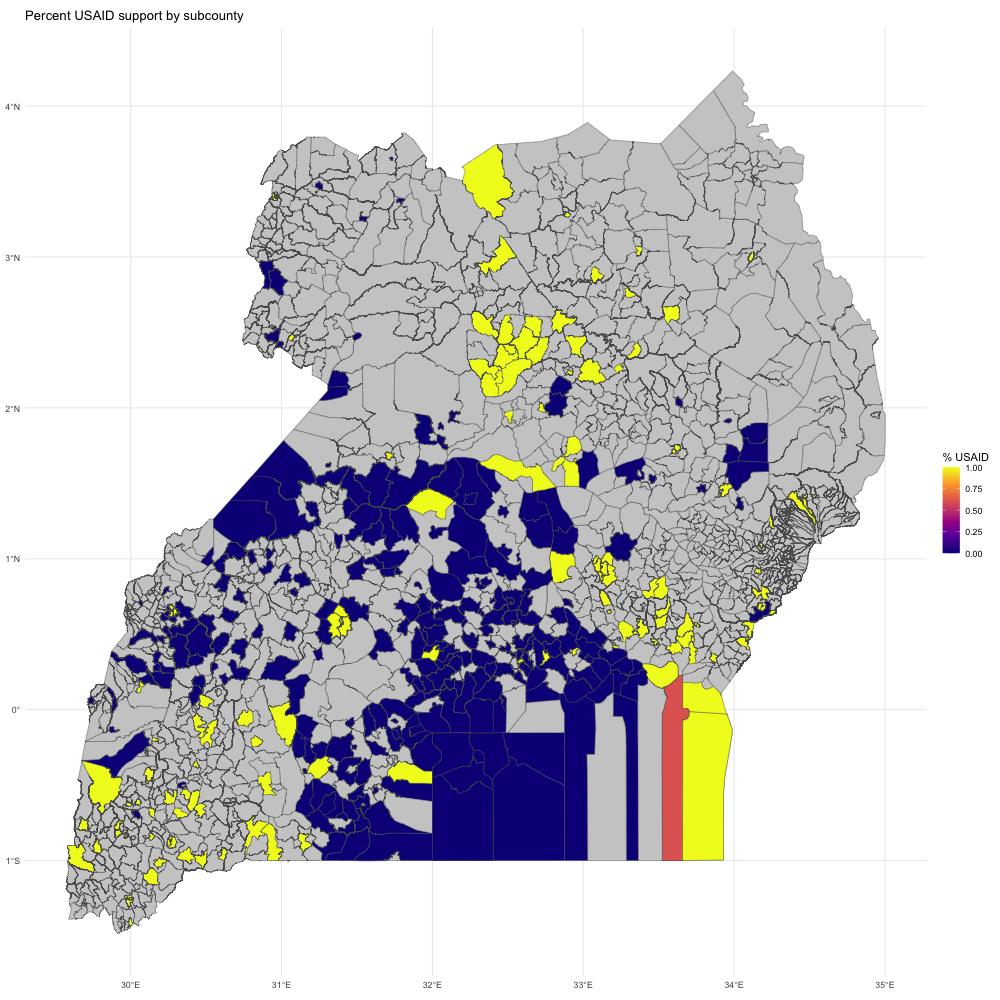

In [291]:
%%R -h 1000 -w 1000

ggplot(usaid_geo) +
  geom_sf(aes(fill = pct_usaid_subcounty)) +
  scale_fill_viridis_c(option = "plasma", na.value = "grey80") +
  theme_minimal() +
  labs(title = "Percent USAID support by subcounty", fill = "% USAID")

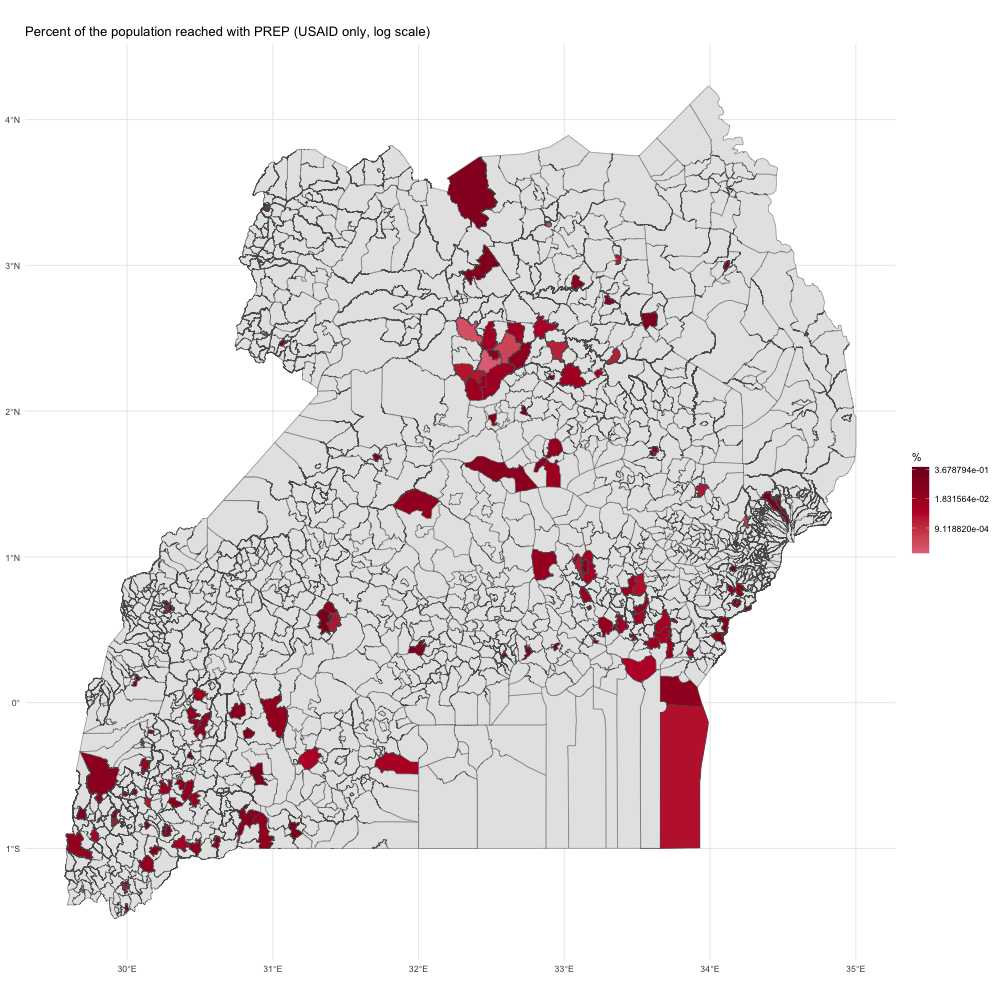

In [313]:
%%R -h 1000 -w 1000

map =
ggplot(usaid_geo) +
  geom_sf(aes(fill = ifelse(usaid == 1, pct_pop_prep, NA))) +
  scale_fill_gradientn(
    colors = c("#e27384", "#ba0c2f", "#7d081f"),
    trans = "log",
    na.value = "grey90"
  ) +
  theme_minimal() +
  labs(
    title = "Percent of the population reached with PREP (USAID only, log scale)",
    fill = "%"
  )

ggsave("map.svg", map, width = 10, height = 10, units = "in", device = "svg")
map

In [292]:
%%R

prep_districts <- read.csv('district_prep_by_funder_cleaned - district_prep_by_funder.csv')

In [293]:
%%R

library(tidyverse)

prep_districts_long <- prep_districts %>%
  pivot_longer(
    cols = -`DHIS2.District`,          # All columns *except* the district column
    names_to = "Funder",               # Name of the new column that will hold the previous column names
    values_to = "Total_Facility"       # Name of the new column that will hold the values
  )

In [294]:
%%R

prep_districts_long

# A tibble: 312 × 3
   DHIS2.District Funder           Total_Facility
   <chr>          <chr>                     <int>
 1 Adjumani       total_prep_usaid              0
 2 Adjumani       total_prep_cdc             1094
 3 Adjumani       total_prep_dod                0
 4 Agago          total_prep_usaid            924
 5 Agago          total_prep_cdc                0
 6 Agago          total_prep_dod                0
 7 Alebtong       total_prep_usaid             52
 8 Alebtong       total_prep_cdc                0
 9 Alebtong       total_prep_dod                0
10 Amolatar       total_prep_usaid           1308
# ℹ 302 more rows
# ℹ Use `print(n = ...)` to see more rows


In [254]:
%%R

# Filter out rows where 'Total Facility' is 0
prep_districts_long <- prep_districts_long %>%
  filter(`Total_Facility` != 0)


In [255]:
%%R

prep_geo <- subcounties %>%
  left_join(prep_districts_long, by = c("ADM2_EN" = "DHIS2.District"))

In addition: Warning message:
In sf_column %in% names(g) :
  Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 389 of `x` matches multiple rows in `y`.
ℹ Row 3 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.


In [256]:
%%R

unmatched <- prep_districts_long %>%
  anti_join(subcounties, by = c("DHIS2.District" = "ADM2_EN")) %>%
  pull(DHIS2.District)

# View them
unmatched

[1] "Sembabule"


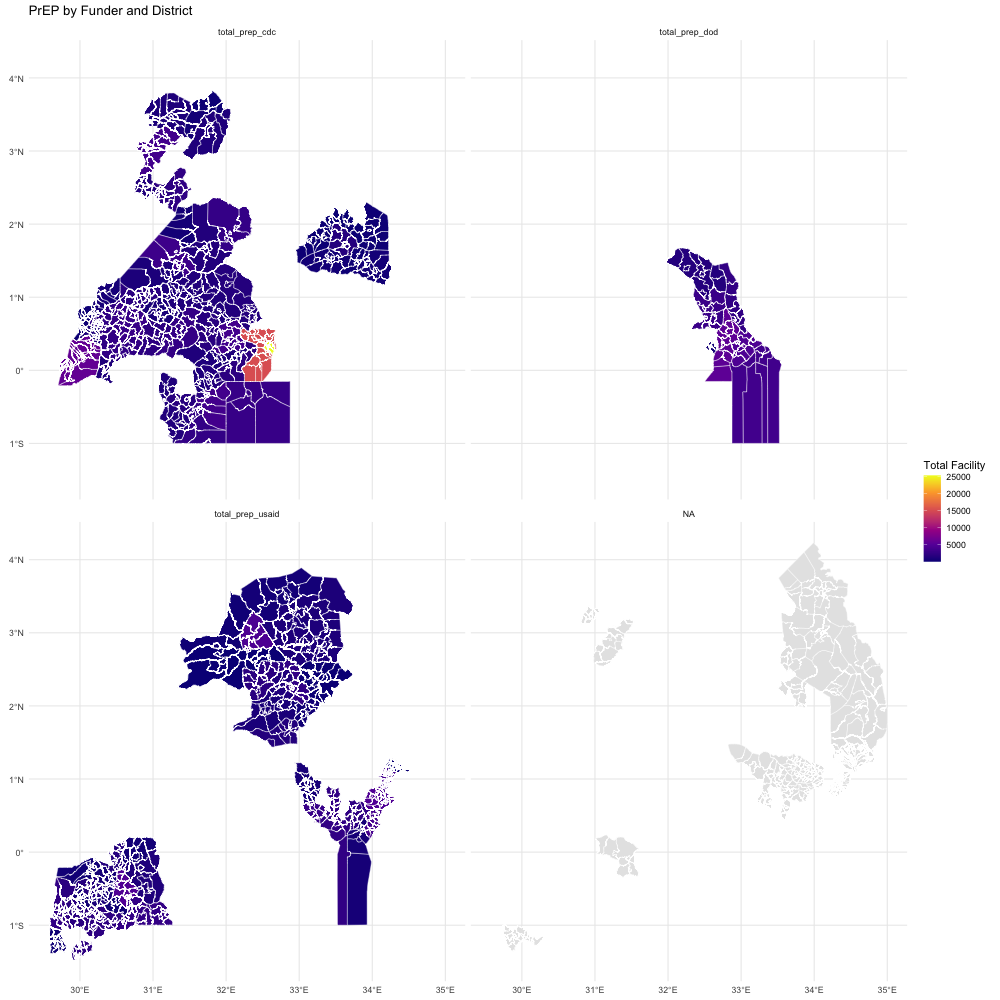

In [257]:
%%R -h 1000 -w 1000

ggplot(prep_geo) +
  geom_sf(aes(fill = Total_Facility), color = "white") +
  facet_wrap(~Funder) +  # creates 3 maps, one per funder
  scale_fill_viridis_c(option = "plasma", na.value = "grey90") +
  theme_minimal() +
  labs(title = "PrEP by Funder and District",
       fill = "Total Facility")


# Creating a choropleth map colored by funder, with darker colors representing districts with more people reached by PREP, and lighter colors representing districts with fewer people reached by PREP

In [316]:
%%R -h 1000 -w 1000

prep_geo <- prep_geo %>%
  mutate(
    fill_color = case_when(
      Funder == "total_prep_usaid" ~ scales::col_numeric(c("#f5c5cb", "#ba0c2f"), domain = NULL)(Total_Facility),
      Funder == "total_prep_cdc"   ~ scales::col_numeric(c("#c9d1de", "#005daa"), domain = NULL)(Total_Facility),
      Funder == "total_prep_dod"   ~ scales::col_numeric(c("#e0e0e0", "#c9d1de"), domain = NULL)(Total_Facility),
      TRUE                         ~ "grey90"
    )
  )

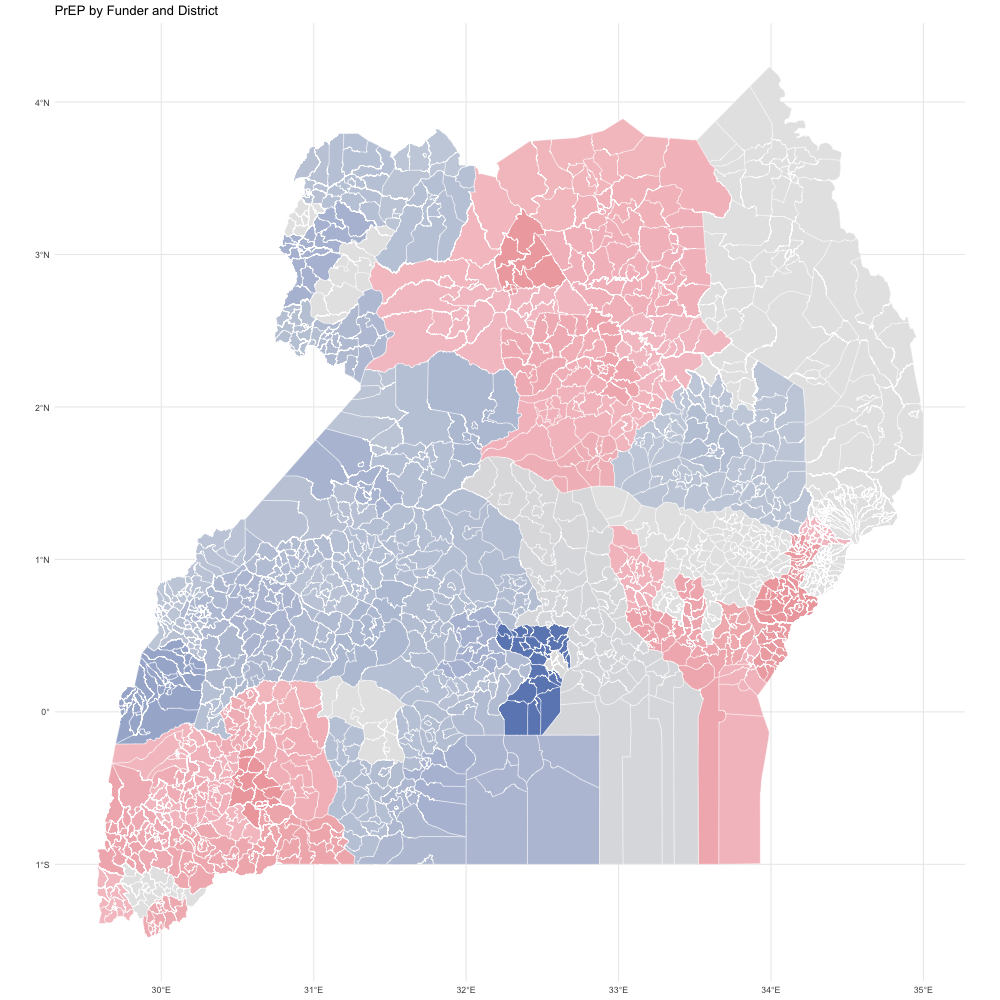

In [321]:
%%R -h 1000 -w 1000

map2 = 
ggplot(prep_geo) +
  geom_sf(aes(fill = fill_color), color = "white", size = 0.3) +
  scale_fill_identity() +
  theme_minimal() +
  labs(title = "PrEP by Funder and District",
       fill = "Total Facility")

ggsave("map2.svg", map2, width = 10, height = 10, units = "in", device = "svg")
map2